### MAI THỊ THẢO LY - 20280064 - KHDL

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive

#drive.mount("/content/drive")

In [2]:
import pandas as pd
PATH = "TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [4]:
print("Qualitative and Quantitative columns \n")
print(df.describe(include=[object, int]))

Qualitative and Quantitative columns 

         Unnamed: 0          Age               Employment Type GraduateOrNot  \
count   1987.000000  1987.000000                          1987          1987   
unique          NaN          NaN                             2             2   
top             NaN          NaN  Private Sector/Self Employed           Yes   
freq            NaN          NaN                          1417          1692   
mean     993.000000    29.650226                           NaN           NaN   
std      573.741812     2.913308                           NaN           NaN   
min        0.000000    25.000000                           NaN           NaN   
25%      496.500000    28.000000                           NaN           NaN   
50%      993.000000    29.000000                           NaN           NaN   
75%     1489.500000    32.000000                           NaN           NaN   
max     1986.000000    35.000000                           NaN           NaN   



array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'AnnualIncome'}>,
        <AxesSubplot:title={'center':'FamilyMembers'}>],
       [<AxesSubplot:title={'center':'ChronicDiseases'}>,
        <AxesSubplot:title={'center':'TravelInsurance'}>]], dtype=object)

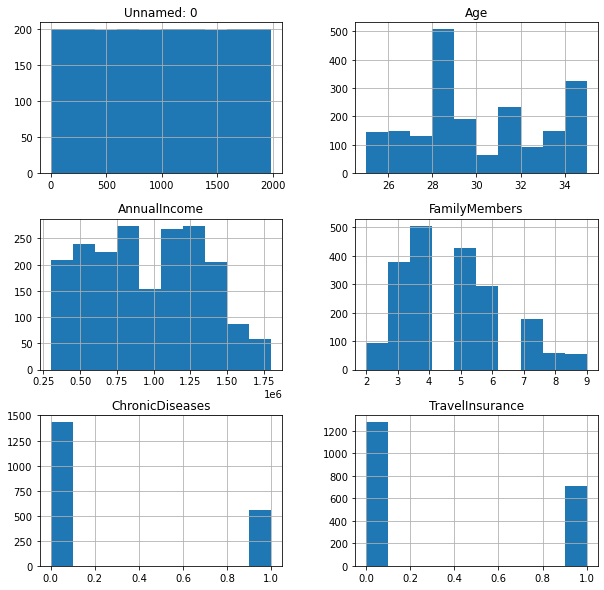

In [5]:
# histogram of dataframe
df.hist(figsize=(10,10))

## Data Analysis

In [6]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [7]:
# Check Missing values
df[categorical_cols].isnull().sum()

Employment Type        0
GraduateOrNot          0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [8]:
df[numerical_cols].isnull().sum()

Unnamed: 0         0
Age                0
AnnualIncome       0
FamilyMembers      0
ChronicDiseases    0
TravelInsurance    0
dtype: int64

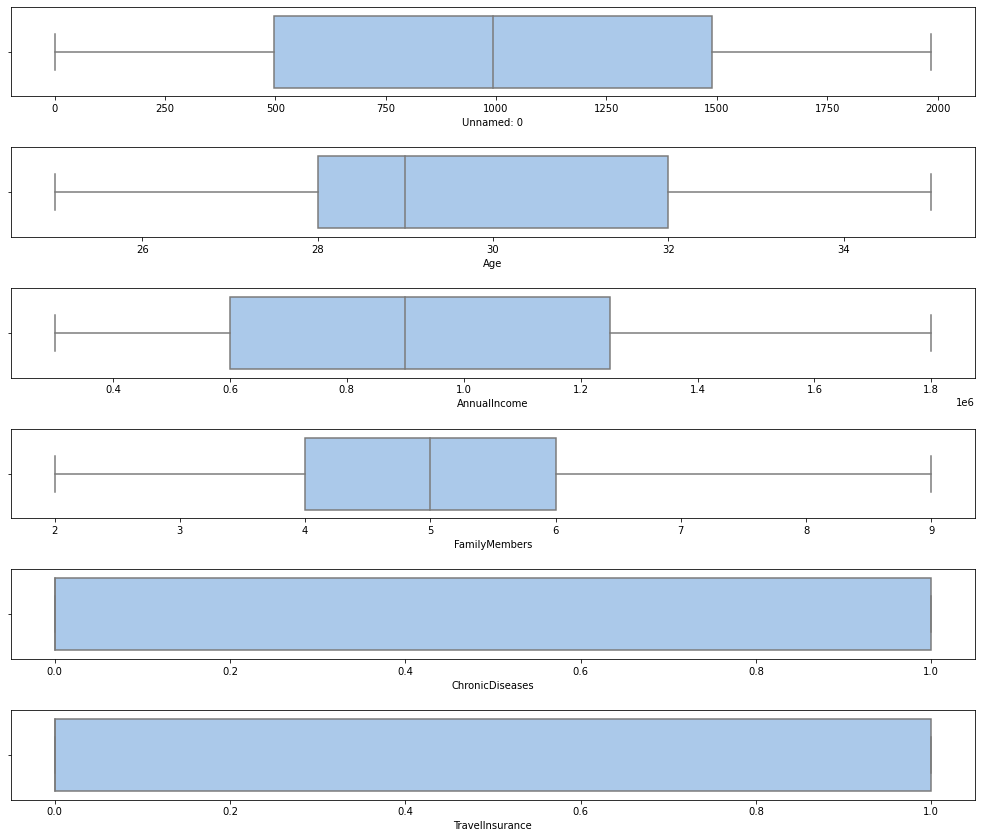

In [9]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='pastel',ax=axes[i])
plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='Age', ylabel='Count'>

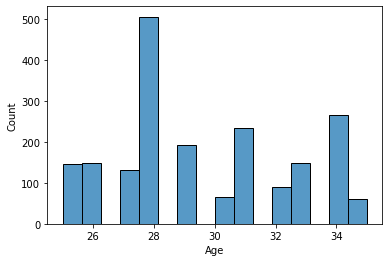

In [10]:
sns.histplot(x="Age", data=df)

<AxesSubplot:xlabel='AnnualIncome', ylabel='Count'>

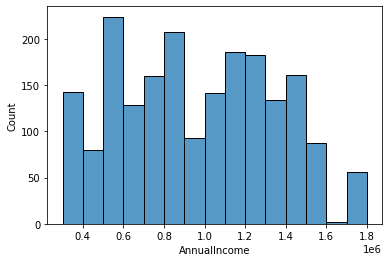

In [11]:
sns.histplot(x="AnnualIncome", data=df)

<AxesSubplot:xlabel='FamilyMembers', ylabel='Count'>

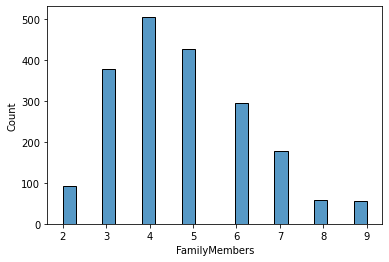

In [12]:
sns.histplot(x="FamilyMembers", data=df)

<AxesSubplot:xlabel='count', ylabel='Employment Type'>

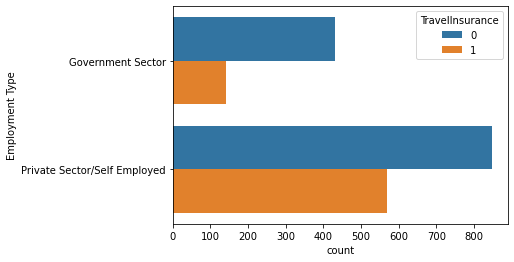

In [13]:
sns.countplot(y="Employment Type", data=df, hue="TravelInsurance")

<AxesSubplot:xlabel='count', ylabel='GraduateOrNot'>

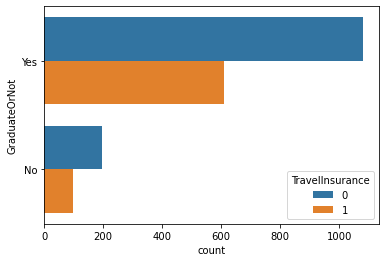

In [14]:
sns.countplot(y="GraduateOrNot", data=df, hue="TravelInsurance")

<AxesSubplot:xlabel='count', ylabel='FrequentFlyer'>

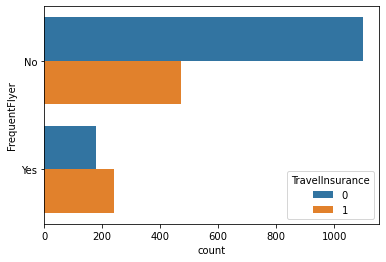

In [15]:
sns.countplot(y="FrequentFlyer", data=df, hue="TravelInsurance")

<AxesSubplot:xlabel='count', ylabel='EverTravelledAbroad'>

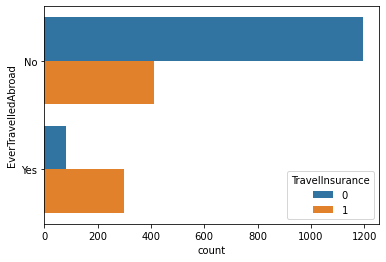

In [16]:
sns.countplot(y="EverTravelledAbroad", data=df, hue="TravelInsurance")

<AxesSubplot:xlabel='TravelInsurance', ylabel='Count'>

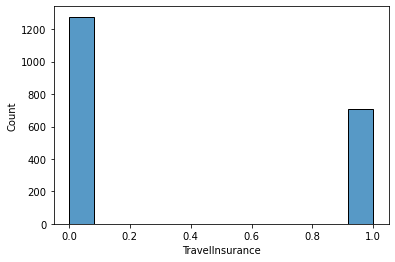

In [17]:
# label
sns.histplot(x="TravelInsurance", data=df)

<AxesSubplot:>

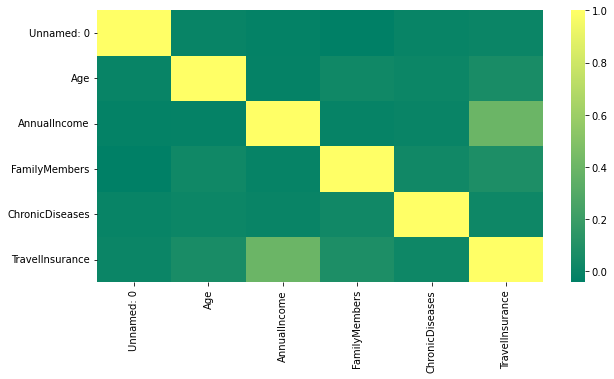

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap="summer")

## Preprocessing

In [19]:
def preprocessing_data(df):
    df.drop("Unnamed: 0", axis=1, inplace=True)
    return df

In [20]:
df = preprocessing_data(df.copy())
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


<AxesSubplot:>

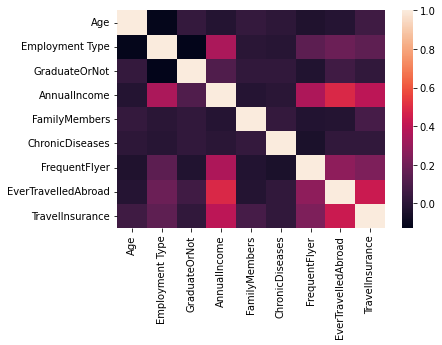

In [21]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    # data normalization
    normalized_data = df.copy()
    normalized_data["Employment Type"] = normalized_data["Employment Type"].astype("category").cat.codes
    normalized_data["GraduateOrNot"] = normalized_data["GraduateOrNot"].astype("category").cat.codes
    normalized_data["FrequentFlyer"] = normalized_data["FrequentFlyer"].astype("category").cat.codes
    normalized_data["EverTravelledAbroad"] = normalized_data["EverTravelledAbroad"].astype("category").cat.codes
    
    display(normalized_data.head())
    display(normalized_data.corr())

    return normalized_data

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [22]:
def prepare_X_y(df):
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Label Imbalanced

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import CategoricalNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)

# Model training
naive_model = CategoricalNB()
naive_model.fit(X_normal_train, y_train.ravel())

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = naive_model.predict(X_normal_test)
print(classification_report(y_test, predicted_label))


              precision    recall  f1-score   support

           0       0.76      0.93      0.83       253
           1       0.80      0.48      0.60       145

    accuracy                           0.77       398
   macro avg       0.78      0.71      0.72       398
weighted avg       0.77      0.77      0.75       398



In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)

# Model training
naive_model = GaussianNB()
naive_model.fit(X_normal_train, y_train.ravel())

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = naive_model.predict(X_normal_test)
print(classification_report(y_test, predicted_label))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83       253
           1       0.76      0.54      0.63       145

    accuracy                           0.77       398
   macro avg       0.77      0.72      0.73       398
weighted avg       0.77      0.77      0.76       398



In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)

# Model training
naive_model = BernoulliNB()
naive_model.fit(X_normal_train, y_train.ravel())

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = naive_model.predict(X_normal_test)
print(classification_report(y_test, predicted_label))


              precision    recall  f1-score   support

           0       0.76      0.92      0.84       253
           1       0.79      0.50      0.62       145

    accuracy                           0.77       398
   macro avg       0.78      0.71      0.73       398
weighted avg       0.78      0.77      0.76       398



In [27]:
from mixed_naive_bayes import MixedNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)
# Model training

clf = MixedNB(categorical_features=[1,2,6,7]) 
clf.fit(X_train, y_train)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = clf.predict(X_test)
print(classification_report(y_test, predicted_label))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       253
           1       0.77      0.52      0.62       145

    accuracy                           0.77       398
   macro avg       0.77      0.72      0.73       398
weighted avg       0.77      0.77      0.76       398



## Fix Label Imbalanced with SMOTE

In [28]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X_train, y_train = make_classification(n_classes=2, weights=[0.7, 0.3], flip_y=0, n_samples=1987, random_state=10)

print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 1391, 1: 596})
Resampled dataset shape Counter({0: 1277, 1: 1277})


In [29]:
# replace X_train, y_train to X_res, y_res
X_train, y_train = X_res, y_res

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import CategoricalNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)

# Model training
naive_model = CategoricalNB()
naive_model.fit(X_normal_train, y_train.ravel())

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = naive_model.predict(X_normal_test)
print(classification_report(y_test, predicted_label))


              precision    recall  f1-score   support

           0       0.77      0.85      0.81       253
           1       0.69      0.56      0.62       145

    accuracy                           0.75       398
   macro avg       0.73      0.71      0.71       398
weighted avg       0.74      0.75      0.74       398



In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)

# Model training
naive_model = GaussianNB()
naive_model.fit(X_normal_train, y_train.ravel())

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = naive_model.predict(X_normal_test)
print(classification_report(y_test, predicted_label))


              precision    recall  f1-score   support

           0       0.78      0.87      0.82       253
           1       0.71      0.57      0.63       145

    accuracy                           0.76       398
   macro avg       0.74      0.72      0.73       398
weighted avg       0.75      0.76      0.75       398



In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)

# Model training
naive_model = BernoulliNB()
naive_model.fit(X_normal_train, y_train.ravel())

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = naive_model.predict(X_normal_test)
print(classification_report(y_test, predicted_label))


              precision    recall  f1-score   support

           0       0.76      0.84      0.80       253
           1       0.66      0.54      0.60       145

    accuracy                           0.73       398
   macro avg       0.71      0.69      0.70       398
weighted avg       0.73      0.73      0.73       398



In [33]:
from mixed_naive_bayes import MixedNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)
# Model training

clf = MixedNB(categorical_features=[1,2,6,7]) 
clf.fit(X_normal_train, y_train)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = clf.predict(X_normal_test)
print(classification_report(y_test, predicted_label))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       253
           1       0.64      0.62      0.63       145

    accuracy                           0.73       398
   macro avg       0.71      0.71      0.71       398
weighted avg       0.73      0.73      0.73       398



## Perform model on training set and test set using gridsearch CV

In [34]:
# -- Build a full pipeline
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)
nb = CategoricalNB()
pipe = Pipeline(steps=[("nb", nb)]) 

# Parameters of pipelines can be set using '__' separated parameter names:
alpha = np.logspace(-1, -9, num=100)
param_grid = {
    'nb__alpha': alpha
    }

search = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=4)
search.fit(X_normal_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_normal_test)
print(classification_report(y_test, predicted_label))

Best parameter (CV score=0.493):
{'nb__alpha': 0.1}
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       253
           1       0.69      0.56      0.62       145

    accuracy                           0.75       398
   macro avg       0.73      0.71      0.71       398
weighted avg       0.74      0.75      0.74       398



In [35]:
# -- Build a full pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)
nb = BernoulliNB()
pipe = Pipeline(steps=[("nb", nb)]) 

# Parameters of pipelines can be set using '__' separated parameter names:
alpha = np.logspace(-1, -9, num=100)
param_grid = {
    'nb__alpha': alpha
    }

search = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=4)
search.fit(X_normal_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_normal_test)
print(classification_report(y_test, predicted_label))

Best parameter (CV score=0.507):
{'nb__alpha': 0.1}
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       253
           1       0.66      0.54      0.60       145

    accuracy                           0.73       398
   macro avg       0.71      0.69      0.70       398
weighted avg       0.73      0.73      0.73       398



In [36]:
# -- Build a full pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)
gau_nb = GaussianNB()
pipe = Pipeline(steps=[("gau_nb", gau_nb)]) 

# Parameters of pipelines can be set using '__' separated parameter names:
var_smoothing_values = np.logspace(-1, -9, num=100)
param_grid = {
    'gau_nb__var_smoothing': var_smoothing_values
    }

search = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=4)
search.fit(X_normal_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_normal_test)
print(classification_report(y_test, predicted_label))

Best parameter (CV score=0.511):
{'gau_nb__var_smoothing': 0.02257019719633919}
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       253
           1       0.71      0.57      0.63       145

    accuracy                           0.76       398
   macro avg       0.74      0.72      0.73       398
weighted avg       0.75      0.76      0.75       398



## Build SK-learn model

In [37]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from mixed_naive_bayes import MixedNB

def build_model():
    # Scaler
    normalizer = MinMaxScaler()
    X_normal_train = normalizer.fit_transform(X_train)
    X_normal_test = normalizer.transform(X_test)
    # Model training

    clf = MixedNB(categorical_features=[1,2,6,7]) 
    clf.fit(X_normal_train, y_train)

    return clf

def calculate_performance(y_true, y_pred):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test , y_pred))
    print("Recall: ", recall_score(y_test , y_pred ))
    print("F1: ", f1_score(y_test , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_test , y_pred ))
    print("classification_report: \n", classification_report(y_test, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score =recall_score(y_test , y_pred)
    return main_score

model = build_model()
# Compare on training dataset
predicted_label = clf.predict(X_normal_test)
calculate_performance(y_test, predicted_label)


Accuracy:  0.7336683417085427
Precision:  0.6382978723404256
Recall:  0.6206896551724138
F1:  0.6293706293706294
Confusion matrix: 
 [[202  51]
 [ 55  90]]
classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       253
           1       0.64      0.62      0.63       145

    accuracy                           0.73       398
   macro avg       0.71      0.71      0.71       398
weighted avg       0.73      0.73      0.73       398



0.6206896551724138

In [48]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7.Em chọn MixedNB vì nó cho recall tốt nhất (scaler bằng MinMaxScaler, không dùng PCA vì model đang ít data và feature, mất cân bằng label (hiện tượng underfitting), giải quyết    việc mất cân bằng ở label bằng oversampling method là SMOTE) và bên cạnh đó các độ đo khác cũng cho kết quả gần nhau. Chọn recall_score. Vì khi ta so sánh giữa việc có mua bảo hiểm bị dự đoán là không mua và không mua được dự đoán là có mua thì ta thấy nên chọn việc không mua được dự đoán là có mua sẽ đem lại nhiều lợi ích cho công ty hơn vì không bỏ sót bất cứ khách hàng tiềm năng nào. " 
           

In [49]:
get_conclusion()

'7.Em chọn MixedNB vì nó cho recall tốt nhất (scaler bằng MinMaxScaler, không dùng PCA vì model đang ít data và feature, mất cân bằng label (hiện tượng underfitting), giải quyết    việc mất cân bằng ở label bằng oversampling method là SMOTE) và bên cạnh đó các độ đo khác cũng cho kết quả gần nhau. Chọn recall_score. Vì khi ta so sánh giữa việc có mua bảo hiểm bị dự đoán là không mua và không mua được dự đoán là có mua thì ta thấy nên chọn việc không mua được dự đoán là có mua sẽ đem lại nhiều lợi ích cho công ty hơn vì không bỏ sót bất cứ khách hàng tiềm năng nào. '